In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading data into dataframe
data = pd.read_csv('/heart.csv')

In [ ]:
#taking peek at data
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#checking for missing values in data set
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

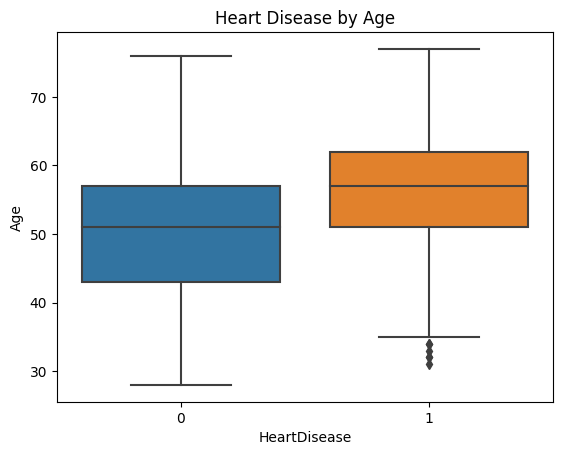

In [ ]:
#creating a box plot showing relationship between age and getting heart disease
sns.boxplot(x='HeartDisease', y='Age', data=data)
plt.title('Heart Disease by Age')
plt.show()

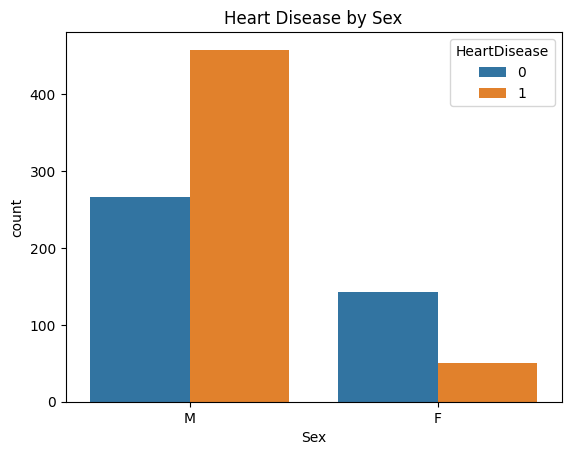

In [ ]:
#creating a count plot showing the distribution of Heart Disease individuals by sex
sns.countplot(x='Sex', hue='HeartDisease', data=data)
plt.title('Heart Disease by Sex')
plt.show()

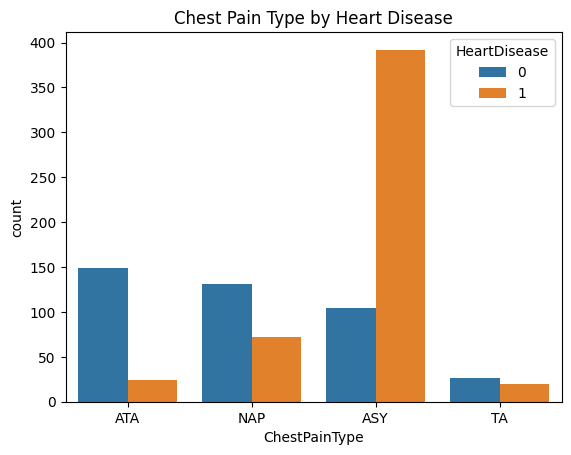

In [ ]:
#creating a count plot showing distribution of heart disease by chest pain symptoms
sns.countplot(x='ChestPainType', hue='HeartDisease', data=data)
plt.title('Chest Pain Type by Heart Disease')
plt.show()

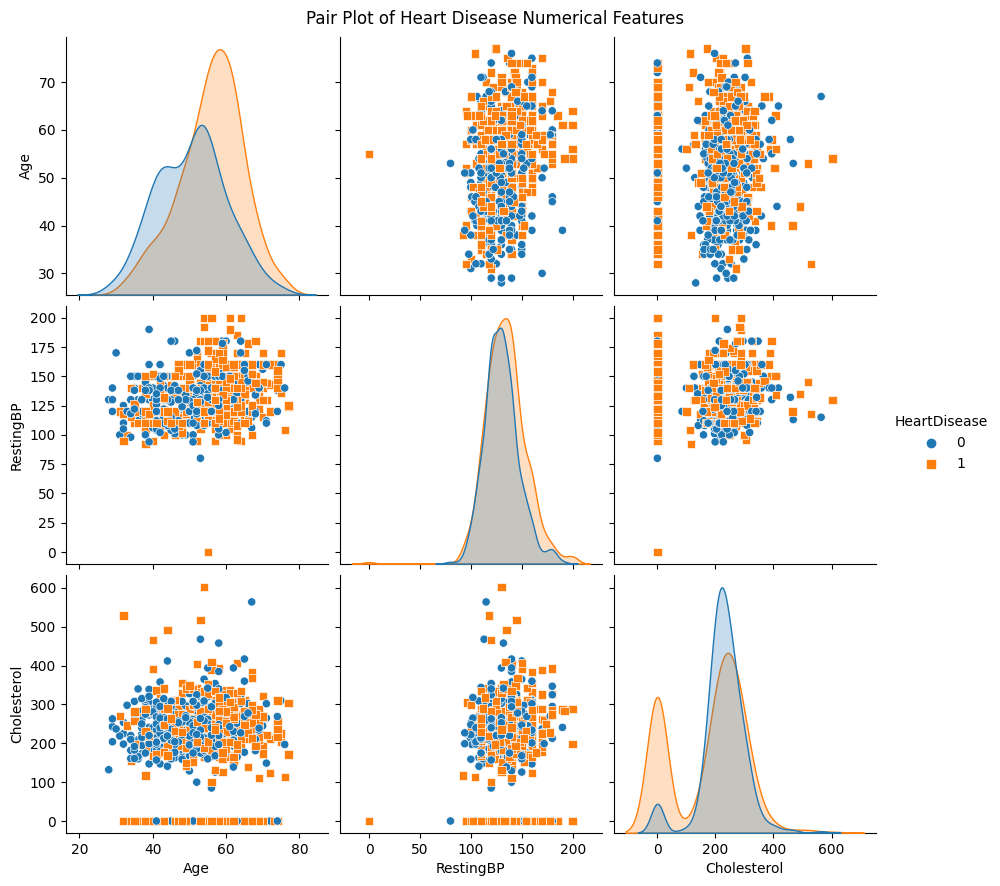

In [ ]:
#creating pairplot of numerical values to look for trends or patterns in different relationships
sns.pairplot(data, vars=['Age', 'RestingBP', 'Cholesterol'], hue='HeartDisease', markers=['o', 's'], height=3, aspect=1)
plt.suptitle('Pair Plot of Heart Disease Numerical Features')
plt.subplots_adjust(top=0.95)
plt.show()

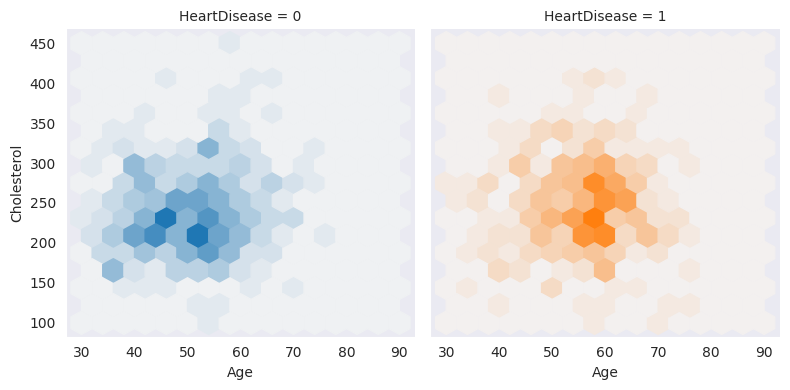

In [ ]:
#creating hexbin plot to compare age/cholesterol - code used from https://seaborn.pydata.org/tutorial/axis_grids.html
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    grid = sns.FacetGrid(data, hue="HeartDisease", col="HeartDisease", height=4)
grid.map(hexbin, "Age", "Cholesterol", extent=[30, 90, 100, 450]);

<ipython-input-10-b0cfa16ee129>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


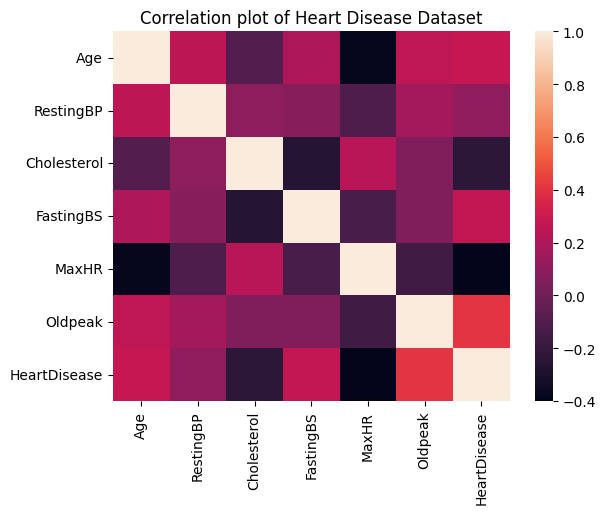

In [ ]:
#creating heatmap to show correlation between variables
corr = data.corr()
sns.heatmap(corr).set(title='Correlation plot of Heart Disease Dataset')
plt.show()

In [ ]:
#creating dummies to one hot encode categorical values into numerical values
#dropping first column of variables with 2 features
data['Sex'] = pd.get_dummies(data['Sex'], drop_first = True)
data['ExerciseAngina'] = pd.get_dummies(data['ExerciseAngina'], drop_first = True)

In [ ]:
#creating dummies to one hot encode categorical values into numerical values
ChestPainType = pd.get_dummies(data['ChestPainType'])
RestingECG = pd.get_dummies(data['RestingECG'])
ST_Slope = pd.get_dummies(data['ST_Slope'])
data = data.drop('ChestPainType', axis = 1)
data = data.drop('RestingECG', axis = 1)
data = data.drop('ST_Slope', axis = 1)

In [ ]:
#adding new encoded series' into dataframe
data = data.join(ChestPainType)
data = data.join(RestingECG)
data = data.join(ST_Slope)

In [ ]:
#Splitting data into X and Y datasets
X = data.drop('HeartDisease',axis=1)
y = data['HeartDisease']

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
#feature scaling data to miniminze impact of outliers
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#fitting data to the models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


#Calling KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

#Calling Gaussian distribution for the Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
#performing k fold and stratified k fold cross validation for both models

k = 5
kf = KFold(n_splits=k)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)
Knnresult = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
Gnbresult = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
knnresult = cross_val_score(knn, X_train, y_train.ravel(), cv = skf, scoring='accuracy')
gnbresult = cross_val_score(gnb, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' KNN 5 Fold Avg Accuracy:{Knnresult.mean():.5}\n')
print(f' GNB 5 Fold Avg Accuracy:{Gnbresult.mean():.5}')
print('-------------------------------------')
print(f' Knn Stratified Avg Accuracy:{knnresult.mean():.5}\n')
print(f' GNB Stratified Avg Accuracy:{gnbresult.mean():.5}\n')


 KNN 5 Fold Avg Accuracy:0.85055

 GNB 5 Fold Avg Accuracy:0.8598
-------------------------------------
 Knn Stratified Avg Accuracy:0.86142

 GNB Stratified Avg Accuracy:0.85993



In [ ]:
# Predicting the Test set results
y_pred_knn = knn.predict(X_test)
y_pred_gnb = gnb.predict(X_test)


In [ ]:
#creating classification report for both models

from sklearn.metrics import classification_report
print('KNN Classification Report:\n')
print(f'{classification_report(y_test, y_pred_knn)}')
print('---------------------------------------------------------------')
print('Naive Bayes Classification Report:\n')
print(classification_report(y_test, y_pred_gnb))

KNN Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       113
           1       0.84      0.88      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.82      0.83       276
weighted avg       0.83      0.83      0.83       276

---------------------------------------------------------------
Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       113
           1       0.85      0.88      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



In [ ]:
#creating confusion matrix for both models

from sklearn.metrics import confusion_matrix

print(f'Confusion Matrix - KNN\n {confusion_matrix(y_test, y_pred_knn)}')
print('---------------')
print(f'Confusion Matrix - Naives Bayes\n {confusion_matrix(y_test, y_pred_gnb)}')

Confusion Matrix - KNN
 [[ 86  27]
 [ 19 144]]
---------------
Confusion Matrix - Naives Bayes
 [[ 88  25]
 [ 20 143]]
